## What is ChronAm's API?

- a set of subroutine definitions, protocols, and tools for building software and applications...

Only kidding

- It's some text on a screen. Go ahead, you can read it!

http://chroniclingamerica.loc.gov/lccn/sn85058396/1916-09-12/ed-1/seq-2.json

## What skills do you need to navigate it?

- Reading

- Willingness

## What can you do with it?


Make stuff

Discover stuff

## Let's Go!

Suppose you want to find out how many pages of newspapers we have for Araizona?

In [4]:
import requests
r = requests.get("http://chroniclingamerica.loc.gov/search/pages/results/?state=Arizona&format=json").json()
r['itemsPerPage']

20

Easy peasy! Now let's get the OCR of the first item in this list:

In [6]:
r['items'][0]['ocr_eng']

'TilU AIUZOXA JIU\'U1I1jICA: SUNDA.Y SlOIiMKU, JLTKK lO, 1\'JOO\nTHE ARIZONA REPUBLICAN\nPublished Every Day in the Year bj\nTHE\nArizona Publishing Co.\nGEO. W. VICKERS. Pres. and Cen. Mg.\nExclusive Morning Associated Press\nP\'spatches. . ,\nThe only Perfecting Prss In Arizona\nThe only battery of Linotypes In\nArizona.\nPublication office: 35-38 East Adams\nstreet. Telephone Main 47.\nEntered at the postoffiee at Phoenix,\nArizona, as mall matter of the second\nclass.\nSUBSCRIPTION RATES.\nBy mail, dally, one year WOO\nWeekly, one year 2.00\nCash in advance.\nBY CARRIER.\nDally, per month 73 cts\nUNlONfcQLrL\nPHOENIX. ARIZONA, JL\'XLO U. 1906.\nA BEGGING SENATORSHIP.\nThe rejection by that unambitious ag\nlku\'turist, the Hon. Dwtght Coburn. of\nthe appointment to the vacant Kansas\nsenatorship need not be attributed to\nhis utter disregard of pomp and pow\ner. Mr. Coburn is already in power,\nvast power, practically illimitab\'.e pow\ner. He is lord of the immeasurable\ncornfie\'d

Now we're going to change up a little bit and do some search terms. This is a bit different, because now the search is based on a relevancy ranking (unlike the previous one). So click on this search to see what it looks like:

http://chroniclingamerica.loc.gov/search/pages/results/?proxtext=dogs

And then add "&format=json" to the end of it to get the API version again:

In [8]:
dogs_search = requests.get('http://chroniclingamerica.loc.gov/search/pages/results/?proxtext=dogs&format=json').json()

We can do the same thing we did before, and just see how many results there are:

In [9]:
dogs_search['totalItems']

1828960

And we can look at the items themselves again:

In [10]:
dogs_search['items'][0]['url']

'http://chroniclingamerica.loc.gov/lccn/sn83045487/1913-04-21/ed-1/seq-20.json'

Maybe now, we want to try something more complicated, like asking, "which state likes dogs?" as is evidenced by the entirely scientific first hundred results for the search "dog" on ChronAm. Note that we added "&rows=100" to this, which means "give me the first hundred results". Most search engines (including this one) let us paginate the results and pick which page we want. Without picking one, we get the first one. So, the top 100 most relevant results.

In [11]:
pages = requests.get("http://chroniclingamerica.loc.gov/search/pages/results/?proxtext=dog&rows=20&format=json").json()

Now we're going to loop over all the results and count them:

In [14]:
from collections import Counter

In [15]:
c = Counter()
for page in pages['items']:
    c[page['state'][0]] += 1
    
c.most_common()

[('California', 6),
 ('Kentucky', 5),
 ('District of Columbia', 3),
 ('New York', 2),
 ('Illinois', 2),
 ('Washington', 1),
 ('Minnesota', 1)]

 But what about Catz you say?! Well let's see which states like cats vs dogs

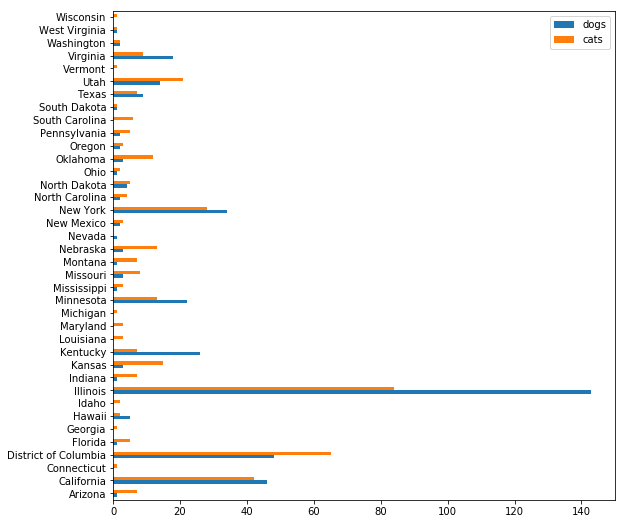

In [61]:
from collections import Counter

pages_of_results = 20
dogs_count = Counter()
cats_count = Counter()

for page in range(0,pages_of_results):
    dogs_json = requests.get("http://chroniclingamerica.loc.gov/search/pages/results/?proxtext=dog&rows=20&format=json&page=" + str(page)).json()
    for item in dogs_json["items"]: 
        dogs_count[item["state"][0]] += 1

for page in range(0,pages_of_results):
    cats_json = requests.get("http://chroniclingamerica.loc.gov/search/pages/results/?proxtext=cat&rows=20&format=json&page=" + str(page)).json()
    for item in cats_json["items"]: 
        cats_count[item["state"][0]] += 1

        
dog_series = pd.Series(dogs_count)
cat_series = pd.Series(cats_count)

dog_vs_cat = pd.concat([dog_series, cat_series], axis=1, keys=["dogs", "cats"])
dog_vs_cat
dog_vs_cat.plot(kind='barh', figsize=(9,9))